In [2]:
%run setup.ipynb

# Feature selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

We will consider only the top 7 features that mostly affect the reproduction rate identified according to their feature importance score.

In [3]:
dataset = pd.read_csv(DATA_PATH+'/dataset.csv')
feature_importances = pd.read_csv(DATA_PATH+'/feature_importances.csv')
feature_importances=feature_importances.drop('Unnamed: 0',axis=1)
dataset=dataset.drop('Unnamed: 0',axis=1)

In [4]:
Y = dataset.iloc[:,0]

## Random Forest with feature selection and without hyperparameter 

In [4]:
importances_rf = feature_importances.sort_values('Feature_importance_rf',ascending=False)

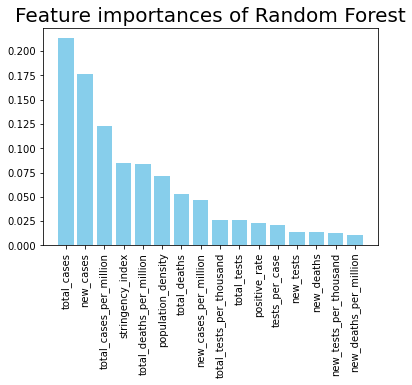

In [5]:
plt.bar(x=importances_rf['Features'], height=importances_rf['Feature_importance_rf'], color='skyblue')
plt.title('Feature importances of Random Forest', size=20)
plt.xticks(rotation=90)
plt.savefig(IMAGES_PATH+"/barplot_rf.jpg",bbox_inches ="tight",pad_inches=1.5,facecolor="white")

In [6]:
X_rf = dataset[['total_cases', 'new_cases','total_cases_per_million','total_deaths',
                 'total_deaths_per_million','stringency_index', 'population_density']]

In [7]:
test_size = 0.29
X_train_rf, X_test_rf, Y_train, Y_test = train_test_split(X_rf,Y,test_size=test_size,random_state=42)
X_train_rf.to_csv(DATA_PATH+'/X_train_rf.csv')
X_test_rf.to_csv(DATA_PATH+'/X_test_rf.csv')

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, n_jobs = (-1), oob_score = True, bootstrap = True, random_state = 42)
rf.fit(X_train_rf, Y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [9]:
Y_pred_rf= rf.predict(X_test_rf)
pd.DataFrame(Y_pred_rf).to_csv(RESULTS_PATH+'/Y_pred_rf_2.csv')

In [10]:
MSE_rf=mean_squared_error(Y_test, Y_pred_rf)
print(MSE_rf)

0.006570135292249315


In [11]:
R2_rf=r2_score(Y_test, Y_pred_rf)
print(R2_rf)

0.919698499164515


In [12]:
RMSE_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print(RMSE_rf)

0.08105637107747493


In [13]:
MAE_rf=mean_absolute_error(Y_test, Y_pred_rf)
print(MAE_rf)

0.03662199543145981


In [14]:
RAE_rf=RAE(Y_test, Y_pred_rf)
print(RAE_rf)

0.07790862635230059


In [15]:
RRSE_rf=RRSE(Y_test, Y_pred_rf)
print(RRSE_rf)

0.2833751944604164


## XGboost with feature selection and without hyperparameter 

In [16]:
importances_xgboost = feature_importances.sort_values('Feature_importance_xgboost',ascending=False)

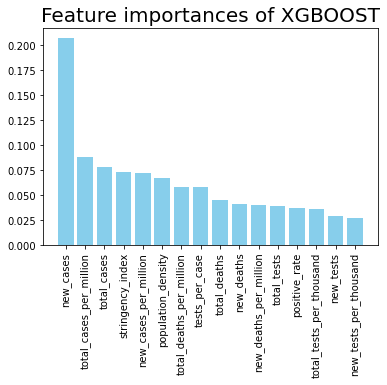

In [17]:
plt.bar(x=importances_xgboost['Features'], height=importances_xgboost['Feature_importance_xgboost'], color='skyblue')
plt.title('Feature importances of XGBOOST', size=20)
plt.xticks(rotation=90)
plt.savefig(IMAGES_PATH+"/barplot_xgboost.jpg",bbox_inches ="tight",pad_inches=1.5,facecolor="white")

In [18]:
X_xgboost = dataset[['total_cases', 'new_cases','total_cases_per_million','new_cases_per_million',
                 'total_deaths_per_million','stringency_index', 'population_density']]

In [19]:
test_size = 0.29
X_train_xgboost, X_test_xgboost, Y_train, Y_test = train_test_split(X_xgboost,Y,test_size=test_size,random_state=42)
X_train_xgboost.to_csv(DATA_PATH+'/X_train_xgboost.csv')
X_test_xgboost.to_csv(DATA_PATH+'/X_test_xgboost.csv')

In [20]:
xgboost = xgb.XGBRegressor(n_estimators=100)
xgboost.fit(X_train_xgboost, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [21]:
Y_pred_xgboost = xgboost.predict(X_test_xgboost)
pd.DataFrame(Y_pred_xgboost).to_csv(RESULTS_PATH+'/Y_pred_xgboost_2.csv')

In [22]:
MSE_xgboost=mean_squared_error(Y_test, Y_pred_xgboost)
print(MSE_xgboost)

0.014594568055666973


In [23]:
R2_xgboost=r2_score(Y_test, Y_pred_xgboost)
print(R2_xgboost)

0.8216222852673623


In [24]:
RMSE_xgboost = np.sqrt(mean_squared_error(Y_test, Y_pred_xgboost))
print(RMSE_xgboost)

0.12080798009927561


In [25]:
MAE_xgboost=mean_absolute_error(Y_test, Y_pred_xgboost)
print(MAE_xgboost)

0.07854470415397681


In [26]:
RAE_xgboost=RAE(Y_test, Y_pred_xgboost)
print(RAE_xgboost)

0.11611652059940464


In [27]:
RRSE_xgboost=RRSE(Y_test, Y_pred_xgboost)
print(RRSE_xgboost)

0.4223478598650917


## Gradient Boosting with feature selection and without hyperparameter 

In [28]:
importances_gbr = feature_importances.sort_values('Feature_importance_gbr',ascending=False)

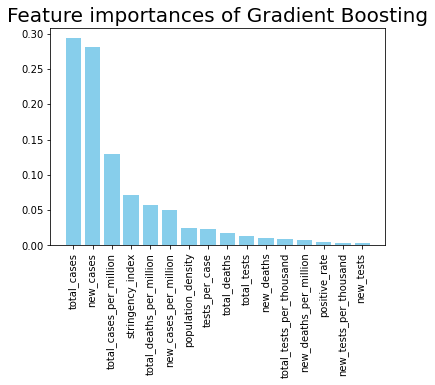

In [29]:
plt.bar(x=importances_gbr['Features'], height=importances_gbr['Feature_importance_gbr'], color='skyblue')
plt.title('Feature importances of Gradient Boosting', size=20)
plt.xticks(rotation=90)
plt.savefig(IMAGES_PATH+"/Barplot_gbr.jpg",bbox_inches ="tight",pad_inches=1.5,facecolor="white")

In [30]:
X_gbr = dataset[['total_cases', 'new_cases','total_cases_per_million','new_cases_per_million',
                 'total_deaths_per_million','stringency_index', 'tests_per_case']]

In [31]:
test_size = 0.29
X_train_gbr, X_test_gbr, Y_train, Y_test = train_test_split(X_gbr,Y,test_size=test_size,random_state=42)
X_train_gbr.to_csv(DATA_PATH+'/X_train_gbr.csv')
X_test_gbr.to_csv(DATA_PATH+'/X_test_gbr.csv')

In [32]:
gbr_params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train_gbr, Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [33]:
Y_pred_gbr = gbr.predict(X_test_gbr)
pd.DataFrame(Y_pred_gbr).to_csv(RESULTS_PATH+'/Y_pred_gbr_2.csv')

In [34]:
MSE_gbr=mean_squared_error(Y_test, Y_pred_gbr)
print(MSE_gbr)

0.04433967401773604


In [35]:
R2_gbr=r2_score(Y_test, Y_pred_gbr)
print(R2_gbr)

0.4580716816622211


In [36]:
RMSE_gbr = np.sqrt(mean_squared_error(Y_test, Y_pred_gbr))
print(RMSE_gbr)

0.21056987917965864


In [37]:
MAE_gbr=mean_absolute_error(Y_test, Y_pred_gbr)
print(MAE_gbr)

0.14403272835734962


In [38]:
RAE_gbr=RAE(Y_test, Y_pred_gbr)
print(RAE_gbr)

0.20239260430715236


In [39]:
RRSE_gbr=RRSE(Y_test, Y_pred_gbr)
print(RRSE_gbr)

0.7361578080396461


## K-nearest neighbor with feature selection and without hyperparameter 

In [40]:
X_knn_svr = dataset[['total_cases', 'new_cases','total_cases_per_million', 
                 'total_deaths_per_million','stringency_index','new_cases_per_million', 'population_density']]

In [41]:
test_size = 0.29
X_train_knn_svr, X_test_knn_svr, Y_train, Y_test = train_test_split(X_knn_svr,Y,test_size=test_size,random_state=42)
X_train_knn_svr.to_csv(DATA_PATH+'/X_train_knn_svr.csv')
X_test_knn_svr.to_csv(DATA_PATH+'/X_test_knn_svr.csv')

In [42]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_knn_svr, Y_train)

KNeighborsRegressor(n_neighbors=7)

In [43]:
Y_pred_knn = knn.predict(X_test_knn_svr)
pd.DataFrame(Y_pred_knn).to_csv(RESULTS_PATH+'/Y_pred_knn_2.csv')

In [44]:
MSE_knn=mean_squared_error(Y_test, Y_pred_knn)
print(MSE_knn)

0.023852790557908822


In [45]:
R2_knn=r2_score(Y_test, Y_pred_knn)
print(R2_knn)

0.7084664476888096


In [46]:
RMSE_knn = np.sqrt(mean_squared_error(Y_test, Y_pred_knn))
print(RMSE_knn)

0.1544434866153598


In [47]:
MAE_knn=mean_absolute_error(Y_test, Y_pred_knn)
print(MAE_knn)

0.0875367100875309


In [48]:
RAE_knn=RAE(Y_test, Y_pred_knn)
print(RAE_knn)

0.1484458251870357


In [49]:
RRSE_knn=RRSE(Y_test, Y_pred_knn)
print(RRSE_knn)

0.5399384708567775


## Support-vector regression with feature selection and without hyperparameter 

In [50]:
svr = SVR(kernel = 'rbf')

In [51]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_std = sc_X.fit_transform(X_train_knn_svr)
Y_train_std = sc_y.fit_transform(Y_train.values.reshape(-1,1))
X_test_std = sc_X.fit_transform(X_test_knn_svr)

In [52]:
svr.fit(X_train_std, np.ravel(Y_train_std))
y_pred = svr.predict(X_test_std)
Y_pred_svr = sc_y.inverse_transform(y_pred) 
pd.DataFrame(Y_pred_svr).to_csv(RESULTS_PATH+'/Y_pred_svr_2.csv')

In [53]:
MSE_svr=mean_squared_error(Y_test, Y_pred_svr)
print(MSE_svr)

0.0685364786471715


In [54]:
R2_svr=r2_score(Y_test, Y_pred_svr)
print(R2_svr)

0.16233352091858289


In [55]:
MAE_svr=mean_absolute_error(Y_test, Y_pred_svr)
print(MAE_svr)

0.16783694509066827


In [56]:
RMSE_svr = np.sqrt(mean_squared_error(Y_test, Y_pred_svr))
print(RMSE_knn)

0.1544434866153598


In [57]:
RAE_svr=RAE(Y_test, Y_pred_svr)
print(RAE_svr)

0.25162818456555924


In [58]:
RRSE_svr=RRSE(Y_test, Y_pred_svr)
print(RRSE_svr)

0.9152412136051133


Performance comparison graph of regression techniques with feature selection and without hyperparameter tuning:

In [59]:
rf_index=[MAE_rf,MSE_rf,RMSE_rf,R2_rf,RAE_rf,RRSE_rf]
xgboost_index=[MAE_xgboost,MSE_xgboost,RMSE_xgboost,R2_xgboost,RAE_xgboost,RRSE_xgboost]
gbr_index=[MAE_gbr,MSE_gbr,RMSE_gbr,R2_gbr,RAE_gbr,RRSE_gbr]
knn_index=[MAE_knn,MSE_knn,RMSE_knn,R2_knn,RAE_knn,RRSE_knn]
svr_index=[MAE_svr,MSE_svr,RMSE_svr,R2_svr,RAE_svr,RRSE_svr]

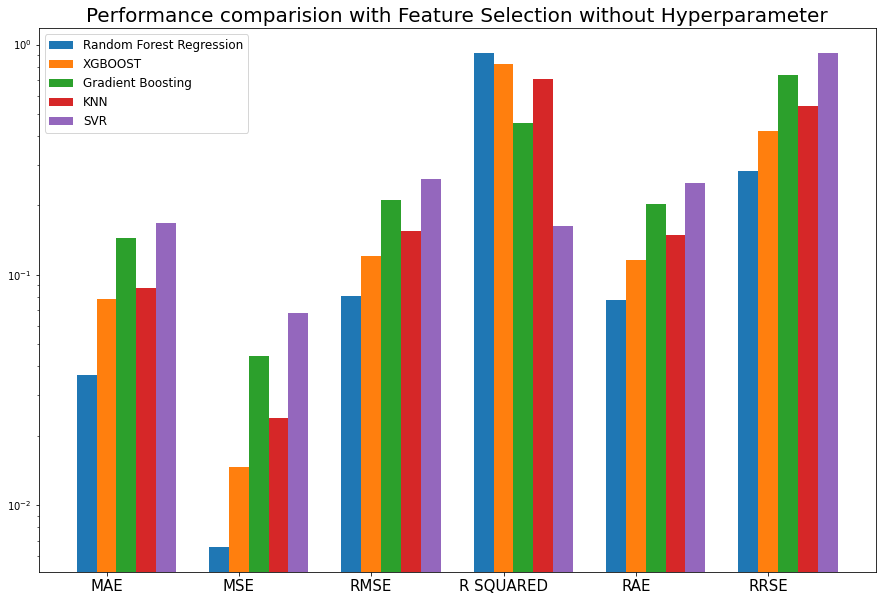

In [60]:
plt.figure(figsize=[15, 10])
X = np.arange(len(rf_index))
plt.bar(X, rf_index, color = 'tab:blue', width = 0.15)
plt.bar(X + 0.15, xgboost_index, color = 'tab:orange', width = 0.15)
plt.bar(X + 0.30, gbr_index, color = 'tab:green', width = 0.15)
plt.bar(X + 0.45, knn_index, color = 'tab:red', width = 0.15)
plt.bar(X + 0.60, svr_index, color = 'tab:purple', width = 0.15)
plt.legend(['Random Forest Regression', 'XGBOOST', 'Gradient Boosting','KNN', 'SVR'], fontsize=12)
plt.xticks([i + 0.15 for i in range(6)], ['MAE', 'MSE', 'RMSE', 'R SQUARED', 'RAE', 'RRSE'], fontsize=15)
plt.title("Performance comparision with Feature Selection without Hyperparameter", fontsize=20)
plt.semilogy()
plt.savefig(IMAGES_PATH+"/perf_comparison_2.jpg")

In [61]:
Performance_Metrics=pd.DataFrame({'Performance Metrics':['MAE','MSE','RMSE','R-Squared','RAE','RRSE'],'Random Forest':rf_index,
                          'XGBOOST':xgboost_index,'Gradient Boosting':gbr_index,'KNN':knn_index,'SVR':svr_index})

In [62]:
Performance_Metrics

Performance Metrics  Random Forest   XGBOOST  Gradient Boosting       KNN  \
0                 MAE       0.036622  0.078545           0.144033  0.087537   
1                 MSE       0.006570  0.014595           0.044340  0.023853   
2                RMSE       0.081056  0.120808           0.210570  0.154443   
3           R-Squared       0.919698  0.821622           0.458072  0.708466   
4                 RAE       0.077909  0.116117           0.202393  0.148446   
5                RRSE       0.283375  0.422348           0.736158  0.539938   

        SVR  
0  0.167837  
1  0.068536  
2  0.261795  
3  0.162334  
4  0.251628  
5  0.915241

In the experiment with the selection of seven features and without hyperparameter tuning we observe that there is a reduction in the MAE, MSE, and RAE values of about 0.01 using Random Forest regression compared with the performance metrics of the model without feature selection. There is a marginal reduction in the RMSE values using Gradient Boosting for feature selection. The KNN model improves consistently with feature selection with a reduction of all the errors and the improvement of the R-squared. Instead in general the perfomance metrics of the other methods don't seem to change consistently. The performance of SVR is
the worst among the algorithms compared for reproduction rate prediction. In the experiment with feature selection and without hyperparameter tuning, the Random Forest approach has achieved the top performance with all best scores.

In [63]:
Performance_Metrics.to_csv(RESULTS_PATH+'/Performance_Metrics2.csv')